# Reading from file

One of the most common situations is that you have a data file containing the data you want to read. Perhaps this is data you've produced yourself or maybe it's from a colleague or perhaps from an online source. In an ideal world the file will be perfectly formatted and will be trivial to import into pandas but since this is so often not the case, pandas provides a number of features to make your life easier.

Full information on reading and writing is available in the pandas manual on [IO tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) but first it's worth noting the common formats that pandas can work with:
- Comma separated tables (or tab-separated or space-separated etc.)
- Excel spreadsheets
- HDF5 files
- SQL databases

For this course we will focus on plain-text CSV files as they are perhaps the most common format. It's also common to be provided with data in an Excel format and Pandas provides all the tools you need to extract the data out of Excel and analyse it in Python.

## Reading our first file

You can get access to Pandas by importing the `pandas` module. By convention, it is imported as `pd`:

In [1]:
import pandas as pd

We can use the pandas function `read_csv()` to read the file and convert it to a `DataFrame`. Full documentation for this function can be found in [the manual](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

The first argument to the function is called `filepath_or_buffer`, the documentation for which begins:

> Any valid string path is acceptable. The string could be a URL...

This means that we can take a URL and pass it directly (or via a variable) to the function. For example, here is a file I have prepared for you:

In [2]:
rain = pd.read_csv("https://milliams.com/courses/data_analysis_python/rain.csv")

This gives us the data from the file as a type of object called a `DataFrame`. This is the core of Pandas and we will be exploring many of the things that it can do throughout this course.

We can get Jupyter to display the data by putting the variable name in a cell by itself:

In [3]:
rain

,Cardiff,Stornoway,Oxford,Armagh
1853,NaN,NaN,57.7,53.0
1854,NaN,NaN,37.5,69.8
1855,NaN,NaN,53.4,50.2
1856,NaN,NaN,57.2,55.0
1857,NaN,NaN,61.3,64.6
...,...,...,...,...
2016,99.3,100.0,54.8,61.4
2017,85.0,103.1,48.1,60.7
2018,99.3,96.8,48.9,67.6
2019,119.0,105.6,60.5,72.7


So a `DataFrame` is a table of data, it has columns and rows. In this particular case, the data are the total monthly rainfall (in mm), averaged over each year for each of four cities.

We can see there are a few key parts of the output:

- Down the left-hand side in bold is the *index*. These can be thought of as being like row numbers, but can be more informational. In this case they are the year that the data refers to.

- Along the top are the column names. When we want to refer to a particular column in our `DataFrame`, we will use these names.

- The actual data is then arrayed in the middle of the table. Mostly these are data that we care about, but you will also see some `NaN`s in there as well. This is how Pandas represents *missing data*, in this case years for which there are no measurements.

## Dealing with messy data

Now let's move on to how you can deal with the kind of data you're likely to come across in the real world.

Imagine we have a CSV (comma-separated values) file. The example we will use today is available at [city_pop.csv](https://milliams.com/courses/data_analysis_python/city_pop.csv). If you were to open that file then you would see:

```
This is an example CSV file
The text at the top here is not part of the data but instead is here
to describe the file. You'll see this quite often in real-world data.
A -1 signifies a missing value.

year;London;Paris;Rome
2001;7.322;-1;2.547
2006;7.652;2.18;2.627
2008;;2.211;2.72
2009;-1;2.234;2.734
2011;8.174;2.25;2.76
2012;8.293;2.244;2.627
2015;8.615;2.21;
2019;;;
```

This file has some issues that `read_csv` will not be able to automatically deal with but let's start by trying to read it in directly:

In [4]:
city_pop_file = "https://milliams.com/courses/data_analysis_python/city_pop.csv"
pd.read_csv(city_pop_file)

,This is an example CSV file
0,The text at the top here is not part of the da...
1,to describe the file. You'll see this quite of...
2,A -1 signifies a missing value.
3,year;London;Paris;Rome
4,2001;7.322;-1;2.547
5,2006;7.652;2.18;2.627
6,2008;;2.211;2.72
7,2009;-1;2.234;2.734
8,2011;8.174;2.25;2.76
9,2012;8.293;2.244;2.627


We can see that by default it's done a fairly bad job of parsing the file (this is mostly because I've constructed the `city_pop.csv` file to be as obtuse as possible). It's making a lot of assumptions about the structure of the file but in general it's taking quite a naïve approach.

The first thing we notice is that it's treating the text at the top of the file as though it's data. Checking [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) we see that the simplest way to solve this is to use the `skiprows` argument to the function to which we give an integer giving the number of rows to skip (also note that I've changed to put one argument per line for readability and that the comma at the end is optional but for consistency):

In [5]:
pd.read_csv(
    city_pop_file,
    skiprows=5,
)

,year;London;Paris;Rome
0,2001;7.322;-1;2.547
1,2006;7.652;2.18;2.627
2,2008;;2.211;2.72
3,2009;-1;2.234;2.734
4,2011;8.174;2.25;2.76
5,2012;8.293;2.244;2.627
6,2015;8.615;2.21;
7,2019;;;


The next most obvious problem is that it is not separating the columns at all. This is controlled by the `sep` argument which is set to `','` by default (hence *comma* separated values). We can simply set it to the appropriate semi-colon:

In [6]:
pd.read_csv(
    city_pop_file,
    skiprows=5,
    sep=";",
)

,year,London,Paris,Rome
0,2001,7.322,-1.000,2.547
1,2006,7.652,2.180,2.627
2,2008,NaN,2.211,2.720
3,2009,-1.000,2.234,2.734
4,2011,8.174,2.250,2.760
5,2012,8.293,2.244,2.627
6,2015,8.615,2.210,NaN
7,2019,NaN,NaN,NaN


Now it's actually starting to look like a real table of data.

Reading the descriptive header of our data file we see that a value of `-1` signifies a missing reading so we should mark those too. This can be done after the fact but it is simplest to do it at file read-time using the `na_values` argument:

In [7]:
pd.read_csv(
    city_pop_file,
    skiprows=5,
    sep=";",
    na_values="-1",
)

,year,London,Paris,Rome
0,2001,7.322,NaN,2.547
1,2006,7.652,2.180,2.627
2,2008,NaN,2.211,2.720
3,2009,NaN,2.234,2.734
4,2011,8.174,2.250,2.760
5,2012,8.293,2.244,2.627
6,2015,8.615,2.210,NaN
7,2019,NaN,NaN,NaN


The last this we want to do is use the `year` column as the index for the `DataFrame`. This can be done by passing the name of the column to the `index_col` argument:

In [8]:
census = pd.read_csv(
    city_pop_file,
    skiprows=5,
    sep=";",
    na_values="-1",
    index_col="year",
)
census

,London,Paris,Rome
year,,,
2001,7.322,NaN,2.547
2006,7.652,2.180,2.627
2008,NaN,2.211,2.720
2009,NaN,2.234,2.734
2011,8.174,2.250,2.760
2012,8.293,2.244,2.627
2015,8.615,2.210,NaN
2019,NaN,NaN,NaN


## Visualise your data

Pandas comes with some tools for displaying tables of data visually. We won't cover the details of manipulating these plots here but for quickly checking the shape of the data, it's incredibly useful. It's a good idea to *always* plot your data once you've read it in as it will often show issues with the data more clearly than by scanning table of numbers.

If you have a variable containing a `DataFrame` (like we do with `census`), you can plot it as a line graph using:

<Axes: xlabel='year'>

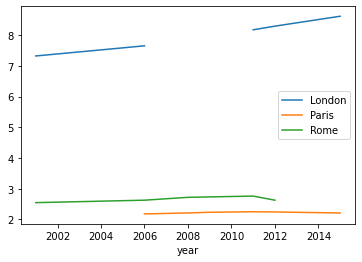

In [9]:
census.plot()

From this we can quickly see the missing data showing as gaps in the graph, and also that there are no clearly anomalous entries.

If you want to dive deeper into how this graph can be improved visually, you can see [a short aside](aside_census_plot.ipynb) which covers that, but which does use some tools that we will not cover until later chapters.

### Exercise

Read the file at [`https://milliams.com/courses/data_analysis_python/meantemp_monthly_totals.txt`](https://milliams.com/courses/data_analysis_python/meantemp_monthly_totals.txt) into Pandas (this data is originally from the [Met Office](https://www.metoffice.gov.uk/hadobs/hadcet/data/download.html) and there's [a description of the format there too](https://www.metoffice.gov.uk/hadobs/hadcet/data/data_format.html) under "Format for monthly CET series data"). This contains some historical weather data for a location in the UK. Import that file as a Pandas `DataFrame` using `read_csv()`, making sure that you set the index column, skip the appropriate rows, separate the columns correctly and cover all the possible NaN values.

[<small>answer</small>](answer_read_weather.ipynb)

That covers the basics of reading in data with pandas. Next we will be looking at how we can query detailed information from our data.